### Part C

In [187]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [188]:
data = pd.read_csv("churn_raw_data.csv")

In [189]:
data[data.Customer_id.duplicated()]

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8


In [190]:
data.isna().sum()

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

<Axes: >

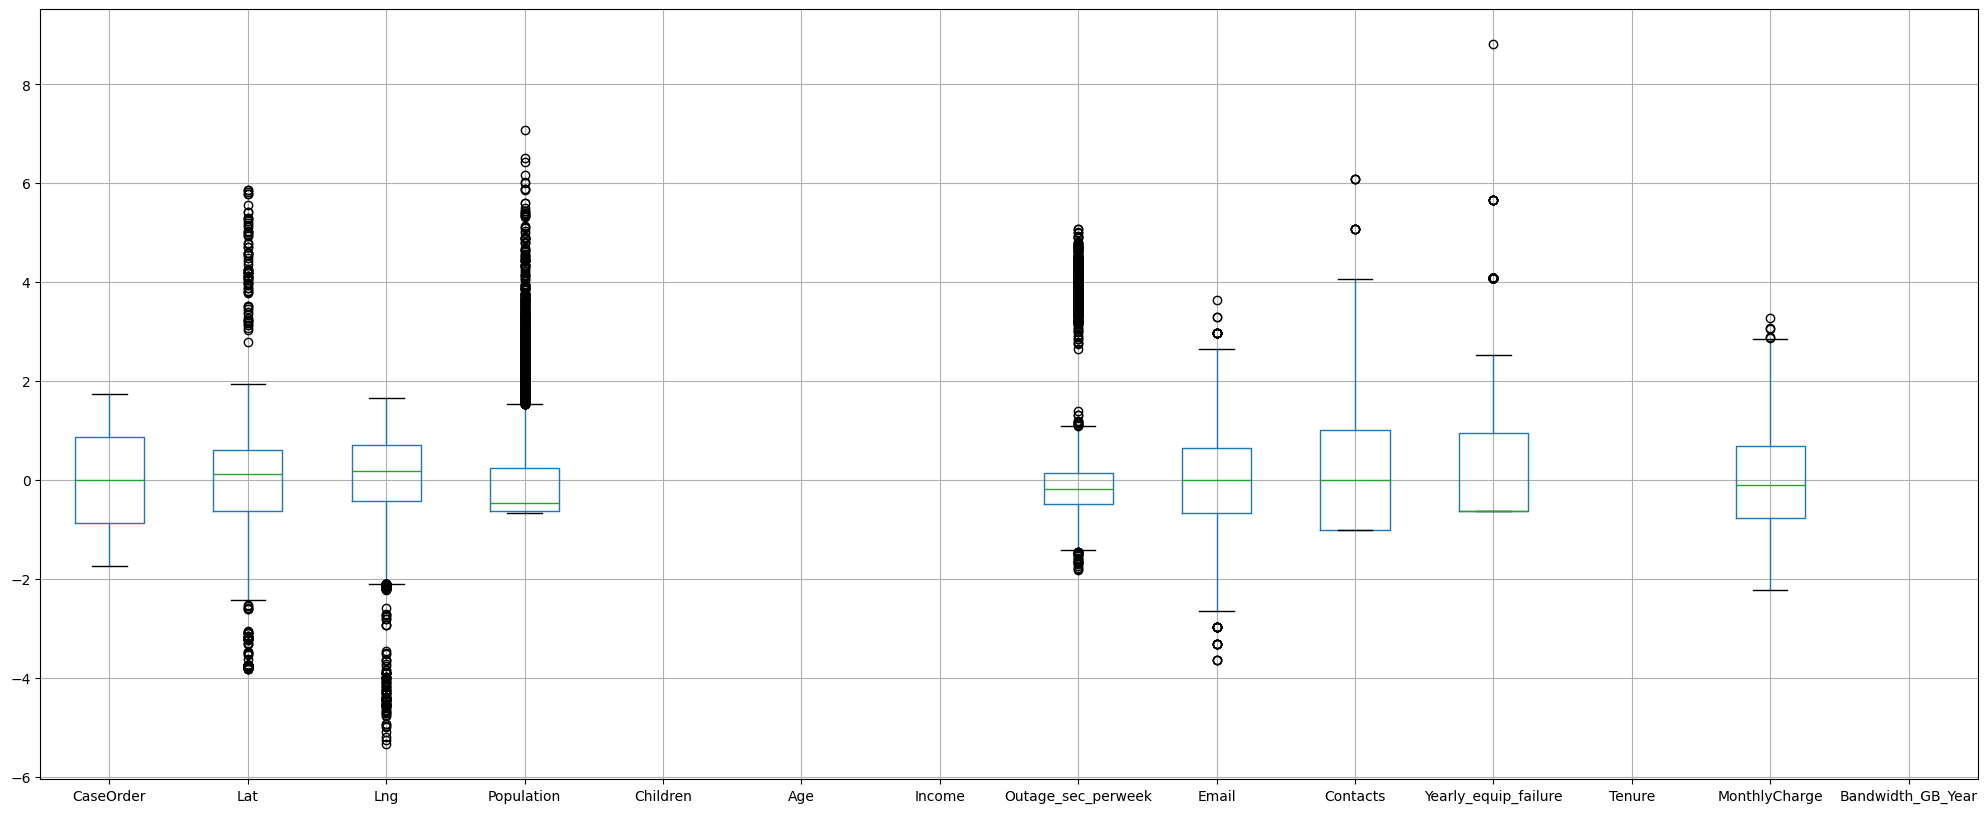

In [191]:
quan_columns = ['CaseOrder','Lat','Lng','Population', 'Children','Age','Income','Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','Tenure','MonthlyCharge', 'Bandwidth_GB_Year']
Z_data = stats.zscore(data[quan_columns])
%matplotlib inline
plt.figure(figsize = (25,10))
Z_data.boxplot()

### Part D

In [192]:
import warnings
warnings.filterwarnings('ignore')

In [193]:
from fancyimpute import KNN

In [194]:
data.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,150.761216,271.493436,4,4,4,3,4,4,4,5


In [195]:
data_Job_testing = data.Job.str.split(",", expand = True)
data_Job_testing.head()

,0,1
0,Environmental health practitioner,None
1,Programmer,multimedia
2,Chief Financial Officer,None
3,Solicitor,None
4,Medical illustrator,None


In [196]:
data.Job = data_Job_testing[0]

In [197]:
convert_yes_to_one = ["Churn","Phone",  "Techie", "Port_modem","Tablet","Multiple", "OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingMovies","StreamingTV","PaperlessBilling"]
data[convert_yes_to_one].head()

,Churn,Phone,Techie,Port_modem,Tablet,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,StreamingTV,PaperlessBilling
0,No,Yes,No,Yes,Yes,No,Yes,Yes,No,No,Yes,No,Yes
1,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes
2,No,Yes,Yes,Yes,No,Yes,No,No,No,No,Yes,No,Yes
3,No,Yes,Yes,No,No,No,Yes,No,No,No,No,Yes,Yes
4,Yes,No,No,Yes,No,No,No,No,No,Yes,No,Yes,No


In [198]:
convert_yes_to_one = ["Churn","Phone",  "Techie", "Port_modem","Tablet","Multiple", "OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingMovies","StreamingTV","PaperlessBilling"]
data[convert_yes_to_one] = data[convert_yes_to_one].replace(["Yes","No"],[1,0])
data[convert_yes_to_one].head()

,Churn,Phone,Techie,Port_modem,Tablet,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,StreamingTV,PaperlessBilling
0,0,1.0,0.0,1,1,0,1,1,0,0.0,1,0,1
1,1,1.0,1.0,0,1,1,1,0,0,0.0,1,1,1
2,0,1.0,1.0,1,0,1,0,0,0,0.0,1,0,1
3,0,1.0,1.0,0,0,0,1,0,0,0.0,0,1,1
4,1,0.0,0.0,1,0,0,0,0,0,1.0,0,1,0


In [199]:
test1 = data.copy(deep = True)

In [200]:
zip = test1[test1.Population == 0].Zip.unique()
zip

array([ 4228, 48397, 11359, 38132, 28019, 10020, 82646, 28629, 85726,
       19109, 99164,  5481, 70451,  7961, 10271, 41848, 95364, 90831,
       64102, 84515, 11351, 10177, 11451, 17120, 10153, 66760, 10154,
       56593, 20202, 89826, 47907, 48242, 19710, 13290, 73019, 86433,
       10170, 40231, 20045, 10169, 40434, 86443, 96850,  1199, 21105,
       98562, 98174, 38131, 13138, 35074, 76957, 29912, 98559, 90747,
       14893, 63902, 53031, 96155, 76523, 20701, 92338, 20053, 90506,
       95915,  2643, 89022, 89831, 99903, 21240, 78029, 21031, 37243,
       54561, 25002, 53792, 11424, 32399, 41762, 89446, 10152, 56741,
       30475, 30164], dtype=int64)

In [201]:
zip = test1[test1.Population == 0].Zip.unique()
# https://stackoverflow.com/questions/19966018/filling-missing-values-by-mean-in-each-group
for x in zip:
    test1.loc[test1.Zip == x, "Population"] = np.nan
    test1.loc[test1.Zip == x, "Population"] = test1.groupby("Area").transform(lambda x: x.fillna(x.mean()))

In [202]:
test1[data.Population == 0].Population.reset_index()

,index,Population
0,13,9545.084185
1,422,9547.954024
2,428,9996.750673
3,434,9550.824726
4,446,9553.696291
...,...,...
92,9216,10041.673982
93,9441,10083.783681
94,9657,9814.620712
95,9702,10086.798265


In [203]:
data.Population = test1.Population

In [204]:
df_knn = data.copy(deep = True)

In [205]:
# drop unusable strings
drop_columns = ["CaseOrder", "Customer_id", "Interaction","County","Timezone"]
#makes values dummies
dummy_columns = ["Area", "Employment","Education" ,"Marital", "Gender", "Contract", "InternetService","PaymentMethod"]
#Cat Variables
cat_columns = ["Job","City","State"]

In [206]:
df_knn[cat_columns] = df_knn[cat_columns].astype('category')
for x in cat_columns:
    df_knn[x] = df_knn[x].cat.codes

In [207]:
df_knn = df_knn.drop(columns = drop_columns, axis = 1)

In [208]:
df_knn = pd.get_dummies(df_knn, columns = dummy_columns)

In [209]:
df_knn.dtypes.head(30)

Unnamed: 0                int64
City                      int16
State                      int8
Zip                       int64
Lat                     float64
Lng                     float64
Population              float64
Job                       int16
Children                float64
Age                     float64
Income                  float64
Churn                     int64
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                  float64
Port_modem                int64
Tablet                    int64
Phone                   float64
Multiple                  int64
OnlineSecurity            int64
OnlineBackup              int64
DeviceProtection          int64
TechSupport             float64
StreamingTV               int64
StreamingMovies           int64
PaperlessBilling          int64
Tenure                  float64
MonthlyCharge           float64
dtype: object

In [210]:
knn_imputer = KNN(k =5)

In [211]:
df_knn.iloc[:,:] = knn_imputer = knn_imputer.fit_transform(df_knn)

Imputing row 1/10000 with 1 missing, elapsed time: 31.432
Imputing row 101/10000 with 2 missing, elapsed time: 31.440
Imputing row 201/10000 with 1 missing, elapsed time: 31.447
Imputing row 301/10000 with 2 missing, elapsed time: 31.454
Imputing row 401/10000 with 1 missing, elapsed time: 31.460
Imputing row 501/10000 with 1 missing, elapsed time: 31.467
Imputing row 601/10000 with 1 missing, elapsed time: 31.474
Imputing row 701/10000 with 0 missing, elapsed time: 31.480
Imputing row 801/10000 with 0 missing, elapsed time: 31.491
Imputing row 901/10000 with 0 missing, elapsed time: 31.497
Imputing row 1001/10000 with 0 missing, elapsed time: 31.506
Imputing row 1101/10000 with 0 missing, elapsed time: 31.515
Imputing row 1201/10000 with 3 missing, elapsed time: 31.522
Imputing row 1301/10000 with 1 missing, elapsed time: 31.529
Imputing row 1401/10000 with 3 missing, elapsed time: 31.538
Imputing row 1501/10000 with 2 missing, elapsed time: 31.545
Imputing row 1601/10000 with 1 missi

In [212]:
missing = ["Children", "Age", "Income", "Techie", "Phone", "TechSupport", "Tenure", "Bandwidth_GB_Year"]

In [213]:
df_knn[missing].head()

,Children,Age,Income,Techie,Phone,TechSupport,Tenure,Bandwidth_GB_Year
0,0.897025,68.0,28561.990000,0.0,1.0,0.0,6.795513,904.536110
1,1.000000,27.0,21704.770000,1.0,1.0,0.0,1.156681,800.982766
2,4.000000,50.0,58483.698806,1.0,1.0,0.0,15.754144,2054.706961
3,1.000000,48.0,18925.230000,1.0,1.0,0.0,17.087227,2164.579412
4,0.000000,83.0,40074.190000,0.0,0.0,1.0,1.670972,271.493436


In [214]:
data[missing] = df_knn[missing]

In [215]:
data.dtypes

Unnamed: 0                int64
CaseOrder                 int64
Customer_id              object
Interaction              object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population              float64
Area                     object
Timezone                 object
Job                      object
Children                float64
Age                     float64
Education                object
Employment               object
Income                  float64
Marital                  object
Gender                   object
Churn                     int64
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                  float64
Contract                 object
Port_modem                int64
Tablet                    int64
InternetService          object
Phone   

In [216]:
missing.remove("Income")
missing.remove("Tenure")
missing.remove("Bandwidth_GB_Year")

In [217]:
data[missing] = round(data[missing]).astype(int)
data[missing]

,Children,Age,Techie,Phone,TechSupport
0,1,68,0,1,0
1,1,27,1,1,0
2,4,50,1,1,0
3,1,48,1,1,0
4,0,83,0,0,1
...,...,...,...,...,...
9995,3,43,0,1,0
9996,4,48,0,1,0
9997,0,87,0,1,0
9998,1,39,0,0,1


In [218]:
data[missing].isna().sum()

Children       0
Age            0
Techie         0
Phone          0
TechSupport    0
dtype: int64

In [219]:
data.to_csv("CleanData.csv")

### Part E

In [220]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [221]:
df = pd.read_csv("CleanData.csv")

In [222]:
pca_columns = ['CaseOrder','Lat','Lng','Population', 'Children','Age','Income','Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','Tenure','MonthlyCharge', 'Bandwidth_GB_Year']
pca_data = df[pca_columns]
pca_data.shape

(10000, 14)

In [223]:
pca_normalize = (pca_data-pca_data.mean())/pca_data.std()
pca = PCA(n_components=pca_data.shape[1])
pca.fit(pca_normalize)

PCA(n_components=14)

In [224]:
churn_pca = pd.DataFrame(pca.transform(pca_normalize),     
     columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14'])

In [225]:
loadings = pd.DataFrame(pca.components_.T,
     columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14'],
     index=pca_data.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
CaseOrder,0.555408,-0.001942,-0.022264,0.007061,-0.008478,-0.007797,-0.006640,-0.008340,0.002745,0.001907,0.024161,-0.001866,0.830711,-0.006890
Lat,-0.013240,-0.710138,-0.089307,0.111433,0.007972,-0.084175,-0.029472,-0.017036,0.090778,0.038394,-0.008987,0.676028,0.004135,0.000918
Lng,0.002285,0.171686,0.081409,-0.703810,-0.406615,0.064056,0.052285,0.053677,-0.248926,-0.293793,0.069866,0.374574,0.004754,0.000160
Population,-0.003647,0.648594,0.060749,0.308177,0.206636,0.049191,0.067761,-0.012004,0.028180,0.176985,0.016392,0.631153,0.006426,0.003596
Children,-0.013185,-0.006721,0.041318,-0.580288,0.293381,-0.069174,-0.034429,-0.022515,0.346953,0.669156,0.012324,-0.004885,0.013770,0.016656
Age,-0.000318,-0.020321,-0.078414,0.135546,-0.519855,0.445588,-0.074247,-0.554263,-0.083883,0.415655,0.113352,-0.020371,-0.014525,-0.016362
Income,0.001417,-0.055781,-0.025591,-0.080361,0.194675,0.158716,0.829638,-0.380635,0.211908,-0.217362,-0.029400,-0.021199,0.005828,0.001941
Outage_sec_perweek,0.011591,-0.110085,0.692978,0.076375,0.066319,0.029898,0.008305,0.001291,0.032035,-0.032366,0.702464,-0.026180,-0.009610,-0.005009
Email,-0.012609,0.148628,0.098663,0.011251,-0.262157,-0.495945,-0.244677,-0.431407,0.579888,-0.257788,-0.063019,0.022808,-0.001746,-0.001701
Contacts,0.003706,0.026563,0.000176,0.130438,-0.486166,0.179835,0.260819,0.597141,0.526889,0.105308,0.004048,-0.015632,-0.000840,0.001194


In [226]:
cov_matrix = np.dot(pca_normalize.T, pca_normalize) / df.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for
eigenvector in pca.components_]

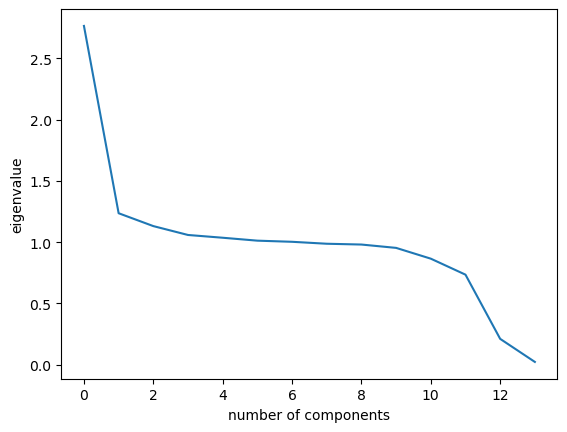

In [227]:
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
plt.show()

In [228]:
eigenvalues

[2.763509866333065,
 1.2360708617460359,
 1.1311631095090742,
 1.0587551804027706,
 1.03622093385749,
 1.0124081067423418,
 1.0031746896803788,
 0.9872627376652672,
 0.9807573232243478,
 0.953465136333925,
 0.8655385617285113,
 0.7350813592001845,
 0.21161606932990312,
 0.023576064246943126]

In [165]:
pca.explained_variance_ratio_.cumsum()

array([0.1974133 , 0.28571291, 0.36651835, 0.44215129, 0.51617447,
       0.58849657, 0.66015907, 0.73068489, 0.80074599, 0.86885745,
       0.93068782, 0.98319888, 0.99831583, 1.        ])